In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Titanic.csv")

In [6]:
import math
import seaborn as sns

In [7]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [8]:
df.shape

(891, 10)

## Analyze Data

<AxesSubplot:xlabel='survived', ylabel='count'>

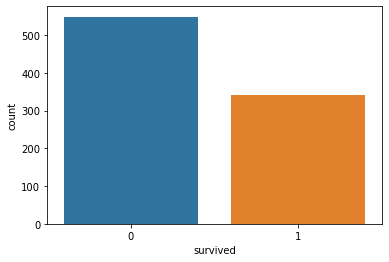

In [9]:
sns.countplot(x = 'survived', data= df)

<AxesSubplot:xlabel='survived', ylabel='count'>

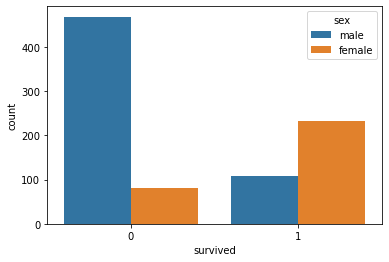

In [10]:
#men and women ratio
sns.countplot(x='survived', hue='sex', data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

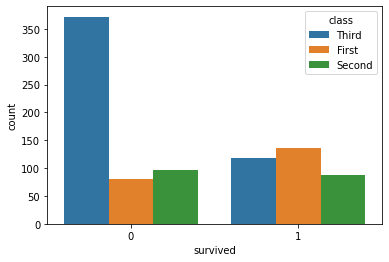

In [11]:
sns.countplot(x='survived', hue='class', data =df)

<AxesSubplot:ylabel='Frequency'>

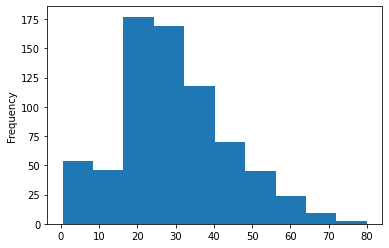

In [12]:
#age distribution
df['age'].plot.hist()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


<AxesSubplot:ylabel='Frequency'>

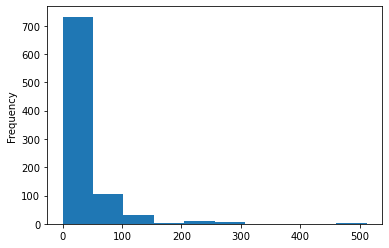

In [14]:
df['fare'].plot.hist()

<AxesSubplot:xlabel='sibsp', ylabel='count'>

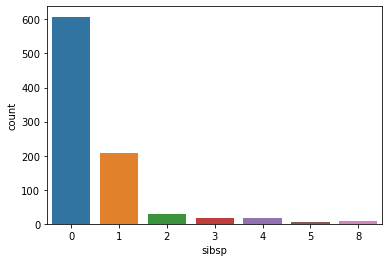

In [15]:
sns.countplot(x='sibsp', data=df)

## Data Wrangling

In [16]:
df.isnull()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False
888,False,True,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

<AxesSubplot:>

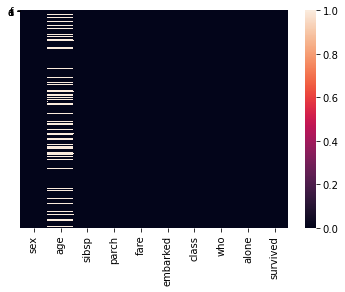

In [18]:
sns.heatmap(df.isnull(),yticklabels='false')

In [19]:
df.dropna(inplace=True)

<AxesSubplot:>

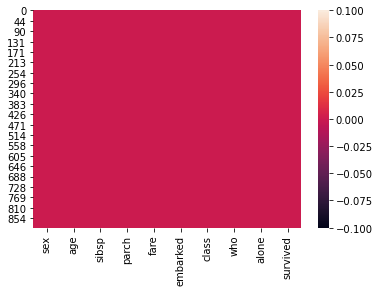

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

Make sure there are no string values. 
In machine learning, we lookout values. 
In logistic regression we require only 2 values in a category

In [22]:
Sex = pd.get_dummies(df['sex'],drop_first=True)

In [23]:
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [24]:
pclass = pd.get_dummies(df['class'],drop_first=True)

In [25]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [26]:
df = pd.concat([df,Sex,embark,pclass], axis= 1)

In [27]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,male,Q,S,Second,Third
0,male,22.0,1,0,7.2500,S,Third,man,False,0,1,0,1,0,1
1,female,38.0,1,0,71.2833,C,First,woman,False,1,0,0,0,0,0
2,female,26.0,0,0,7.9250,S,Third,woman,True,1,0,0,1,0,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1,0,0,1,0,0
4,male,35.0,0,0,8.0500,S,Third,man,True,0,1,0,1,0,1


In [28]:
df.drop(['sex','embarked','who','alone','class'], axis= 1, inplace=True)

In [29]:
df.head()

,age,sibsp,parch,fare,survived,male,Q,S,Second,Third
0,22.0,1,0,7.2500,0,1,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,1,0,1


## Train & Test Data

In [30]:
x = df.drop('survived', axis=1)
y = df['survived']

In [31]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=5)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(x_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predictions= logmodel.predict(x_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85       212\n           1       0.82      0.67      0.74       144\n\n    accuracy                           0.81       356\n   macro avg       0.81      0.78      0.79       356\nweighted avg       0.81      0.81      0.80       356\n'

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, predictions)

array([[190,  22],
       [ 47,  97]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score


In [53]:
accuracy_score(y_test,predictions)

0.8061797752808989